In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

plt.style.use('default') 


plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
sns.set(font_scale = 1)

In [2]:
labels = pd.read_csv('train_labels.csv')
values = pd.read_csv('train_values.csv')
values = values.merge(labels)

## ¿Cuantas edificaciones hay para cada grado de daño?

[Text(0, 0, 'Daño bajo'), Text(1, 0, 'Daño mediano'), Text(2, 0, 'Daño serio')]

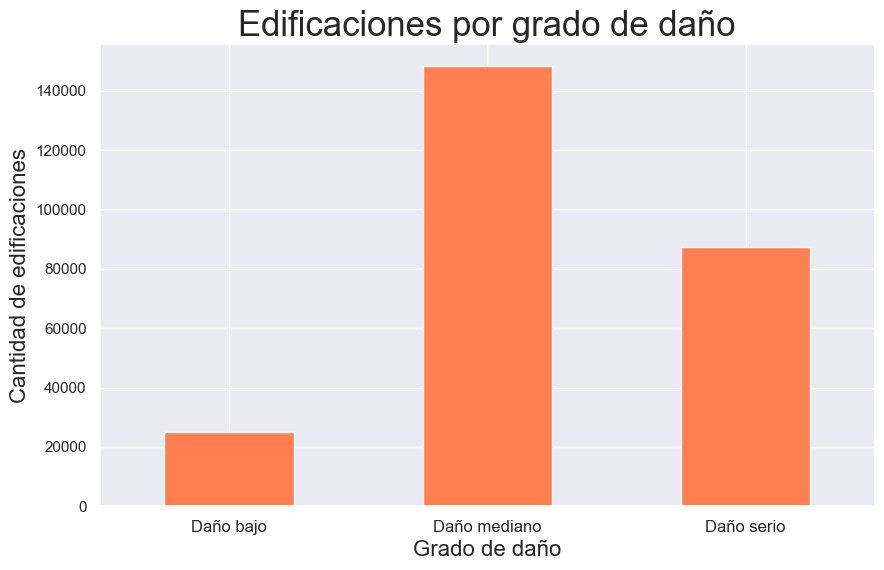

In [3]:
damage_grade_counts = values.damage_grade.value_counts()
# Ordeno y renombro los damage grades
damage_grade_counts = damage_grade_counts[[1, 2, 3]]

g = damage_grade_counts.plot(kind='bar', 
                         color='coral',figsize=(10,6), rot=0)
g.set_title('Edificaciones por grado de daño', fontsize=25)
g.set_xlabel('Grado de daño', fontsize=16)
g.set_ylabel('Cantidad de edificaciones', fontsize=16)
g.set_xticklabels(['Daño bajo', 'Daño mediano', 'Daño serio']
                  ,fontsize=12)

In [4]:
porcentajes = values['damage_grade']\
            .value_counts() / len(values) * 100
porcentajes

2    56.891186
3    33.468022
1     9.640792
Name: damage_grade, dtype: float64

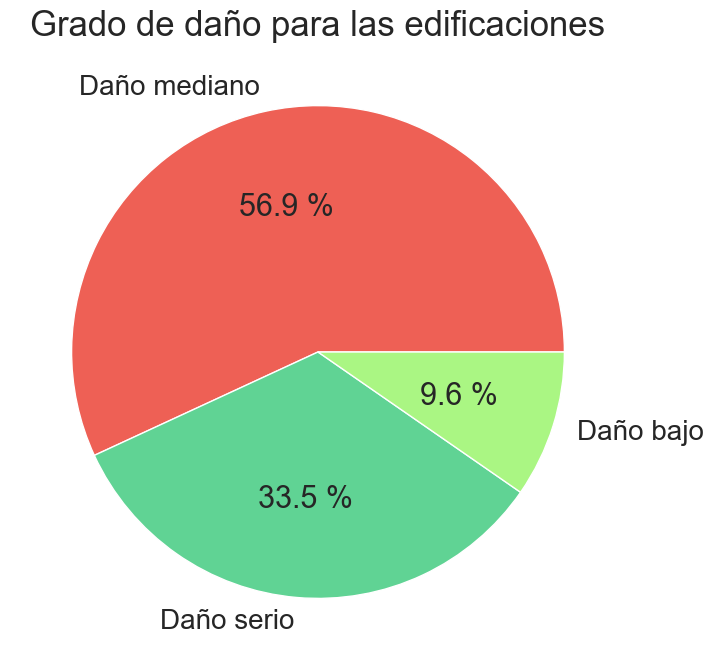

In [5]:
fig, ax = plt.subplots(figsize=(14,8))
etiquetas = ['Daño mediano', 'Daño serio', 'Daño bajo']
colores = ["#EE6055","#60D394","#AAF683"]
wedges, labels, autopct = plt.pie(porcentajes, labels=etiquetas,
                                  autopct="%0.1f %%",
        colors=colores)
ax.set_title('Grado de daño para las edificaciones',
             fontsize=25)
for i in labels:
    i.set_fontsize(20)
for j in autopct:
    j.set_fontsize(22)

# Analisis del tipo de cimientos

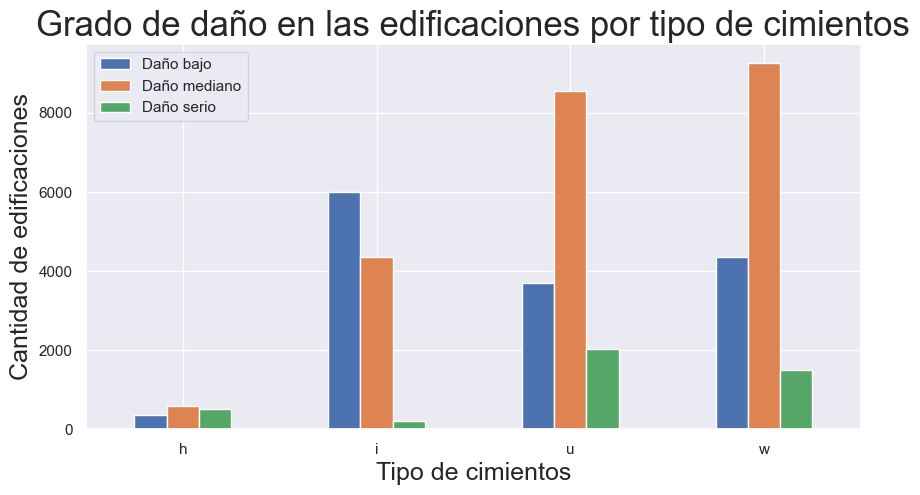

In [6]:
aux = values[['damage_grade', 'foundation_type', 'geo_level_1_id']]
aux = aux.groupby(['damage_grade', 'foundation_type']).count()
aux = aux.unstack(0)
# Separo el tipo de cimiento r porque tiene una escala muy distinta a 
# las de los demas
g = aux.loc[['h', 'i', 'u', 'w'],:].plot.bar(figsize=(10,5), rot=0)
g.set_title("Grado de daño en las edificaciones por tipo de cimientos",
            fontsize=25)
g.set_xlabel("Tipo de cimientos",fontsize=18)
g.set_ylabel("Cantidad de edificaciones", fontsize=18)
plt.legend(['Daño bajo','Daño mediano','Daño serio'])

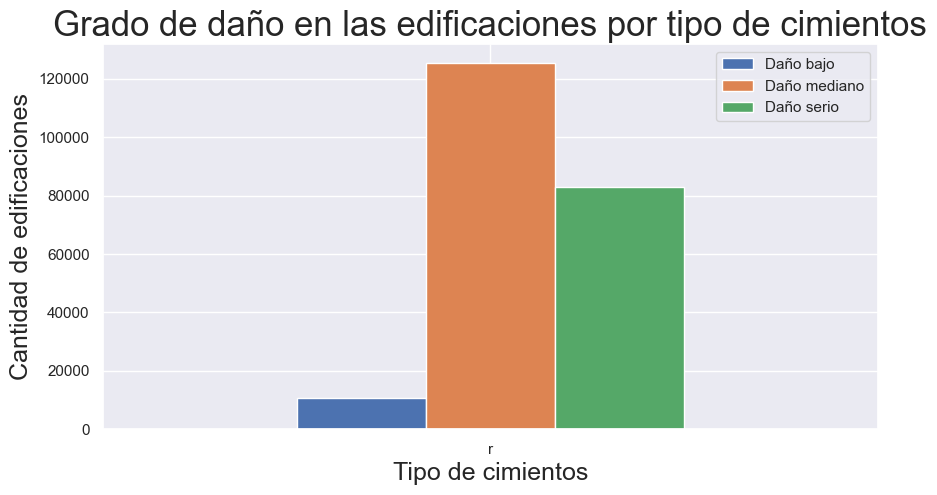

In [7]:
g = aux.loc[['r'],:].plot.bar(figsize=(10,5), rot=0)
g.set_title("Grado de daño en las edificaciones por tipo de cimientos",
            fontsize=25)
g.set_xlabel("Tipo de cimientos",fontsize=18)
g.set_ylabel("Cantidad de edificaciones", fontsize=18)
plt.legend(['Daño bajo','Daño mediano','Daño serio'])

Concluciones los 2 graficos de arriba:
El tipo de fundacion 'i' es el unico que tiene una mayor cantidad de edificaciones con bajo daño que con los otros grados de daño. En los demas tipos de fundacion predomina el daño medio, que, como puede verse en el grafico de edificaciones por grado de daño, es el que predomina en general. Tambien, hay proporcionalmente muchas menos edificaciones de este tipo que recibieron daño serio. En este sentido, se puede decir que el tipo de fundacion 'i' tendio a ser el mas efectivo para mitigar el daño.

Ademas se puede ver que los tipos de fundacion 'u' y 'w' tienen distribuciones similares de los grados de daño, por lo que se puede decir que sus efectividades para mitigar el daño son similares

# Analsis de los materiales de construccion

## ¿Cuales son los materiales que presentan mayores diferencias entre sus porcentajes de participacion en las edificaciones que recibieron daños serios y las que recibieron daños bajos?

In [8]:
# Me quedo solo con las edificaciones con daño bajo o serio para 
# hacer comparaciones entre ambas
danio_bajo_y_serio = values.loc[values.damage_grade != 2]

In [9]:
superstructure_bools = [
    'has_superstructure_adobe_mud',
    'has_superstructure_mud_mortar_stone', 
    'has_superstructure_stone_flag',
    'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber',
    'has_superstructure_bamboo',
    'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered',
    'has_superstructure_other']

titulos = [
    'adobe - barro',
    'barro - piedra', 
    'piedra',
    'cemento - piedra',
    'barro-ladrillos',
    'cemento - ladrillos',
    'Timber',
    'Bambú (caña)',
    'concreto reforzado no-diseñado',
    'concreto reforzado diseñado',
    'otro material'
]

In [10]:
def calcular_porcentaje_bools (x):
    return (np.mean(x)*100)
porcentajes_para_graficar = danio_bajo_y_serio\
            .pivot_table(index='damage_grade',
                values=superstructure_bools,
                    aggfunc=calcular_porcentaje_bools)
porcentajes_para_graficar = porcentajes_para_graficar\
                        .rename({1:'Daño bajo', 3: 'Daño serio'})
porcentajes_para_graficar

,has_superstructure_adobe_mud,has_superstructure_bamboo,has_superstructure_cement_mortar_brick,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_mud_mortar_stone,has_superstructure_other,has_superstructure_rc_engineered,has_superstructure_rc_non_engineered,has_superstructure_stone_flag,has_superstructure_timber
damage_grade,,,,,,,,,,,
Daño bajo,2.364273,11.299952,28.279733,3.299634,2.479701,34.867059,2.611049,10.571565,15.351855,0.724407,30.417131
Daño serio,9.866083,6.092779,1.248595,0.773923,6.237245,86.970579,1.147699,0.085991,1.616639,4.851063,21.349951


In [11]:
abs(porcentajes_para_graficar.loc['Daño bajo'] \
    - porcentajes_para_graficar.loc['Daño serio']).nlargest(10)

has_superstructure_mud_mortar_stone       52.103520
has_superstructure_cement_mortar_brick    27.031137
has_superstructure_rc_non_engineered      13.735216
has_superstructure_rc_engineered          10.485574
has_superstructure_timber                  9.067180
has_superstructure_adobe_mud               7.501809
has_superstructure_bamboo                  5.207173
has_superstructure_stone_flag              4.126656
has_superstructure_mud_mortar_brick        3.757544
has_superstructure_cement_mortar_stone     2.525711
dtype: float64

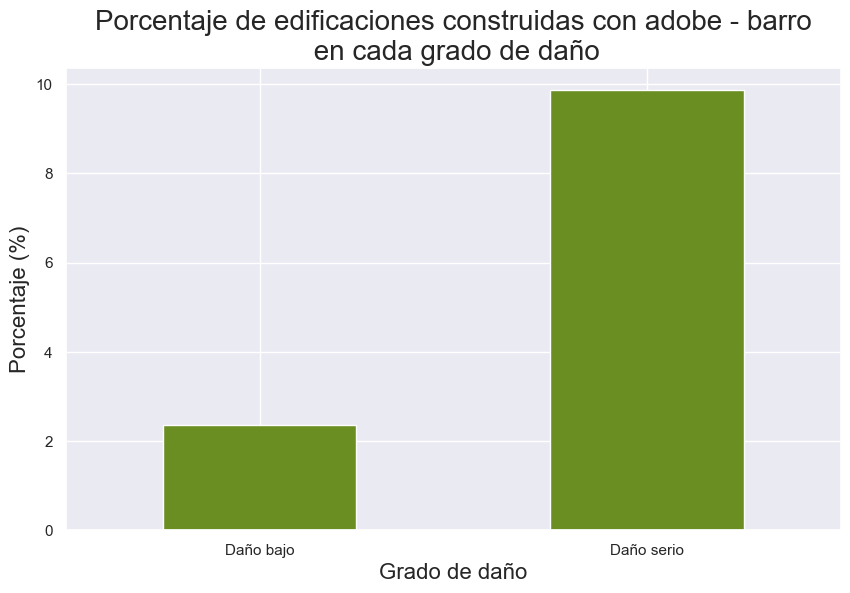

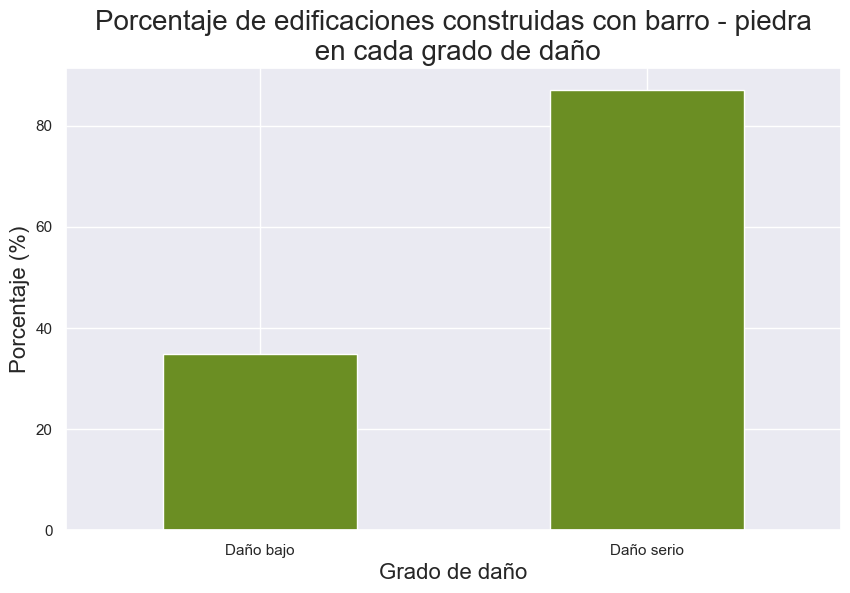

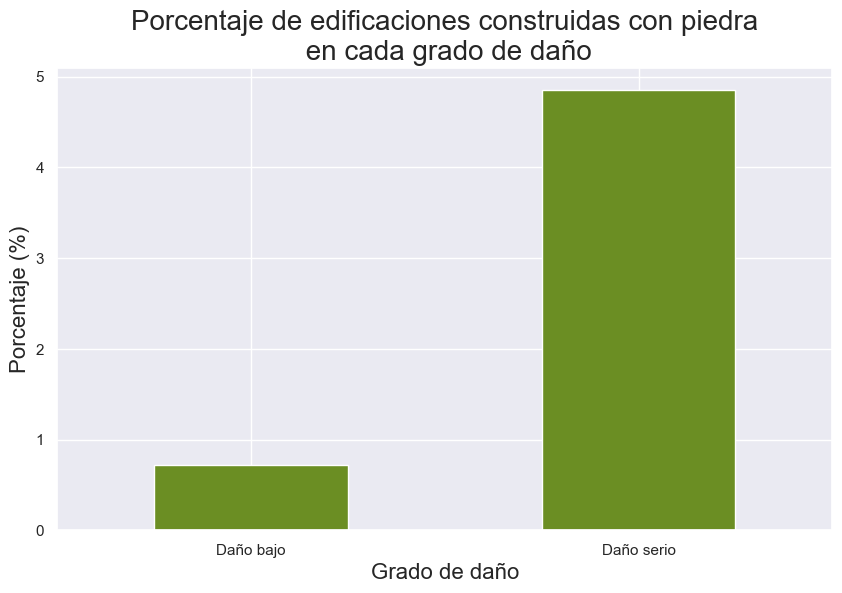

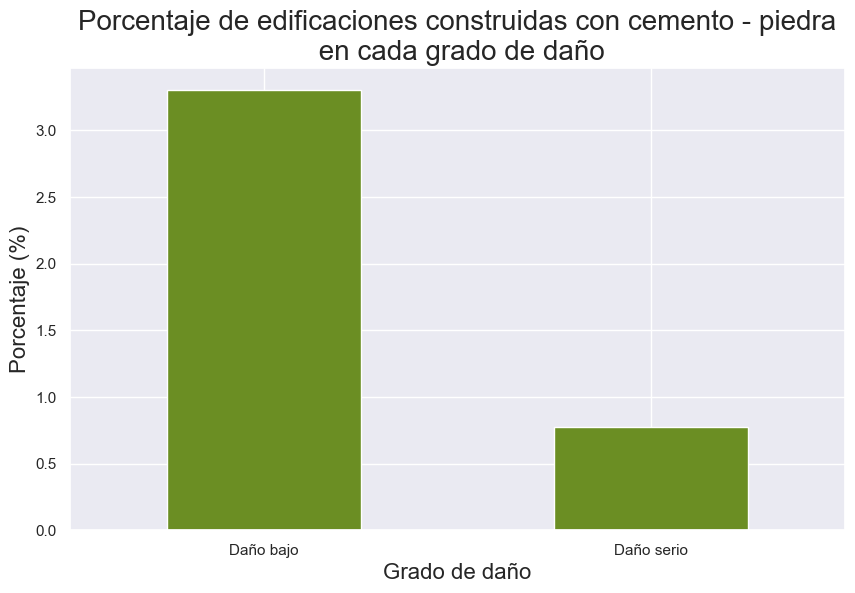

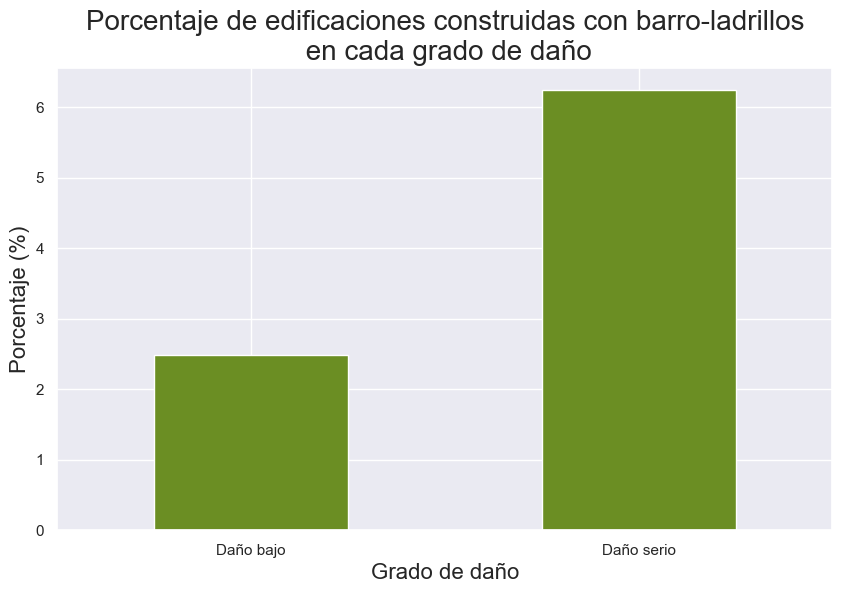

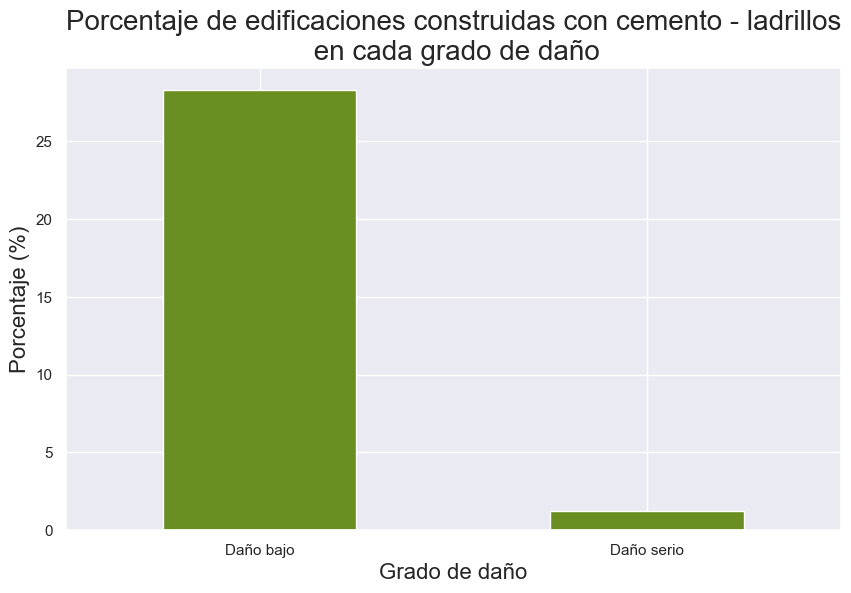

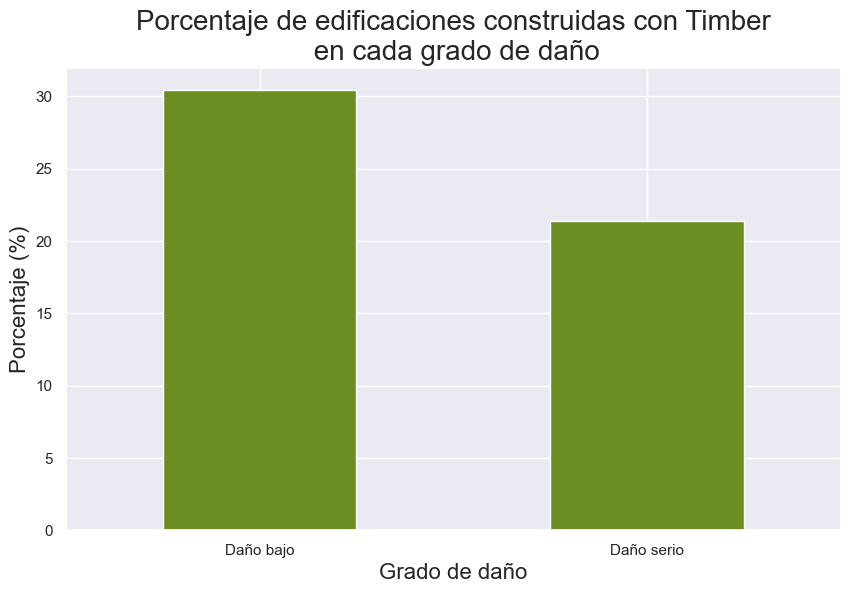

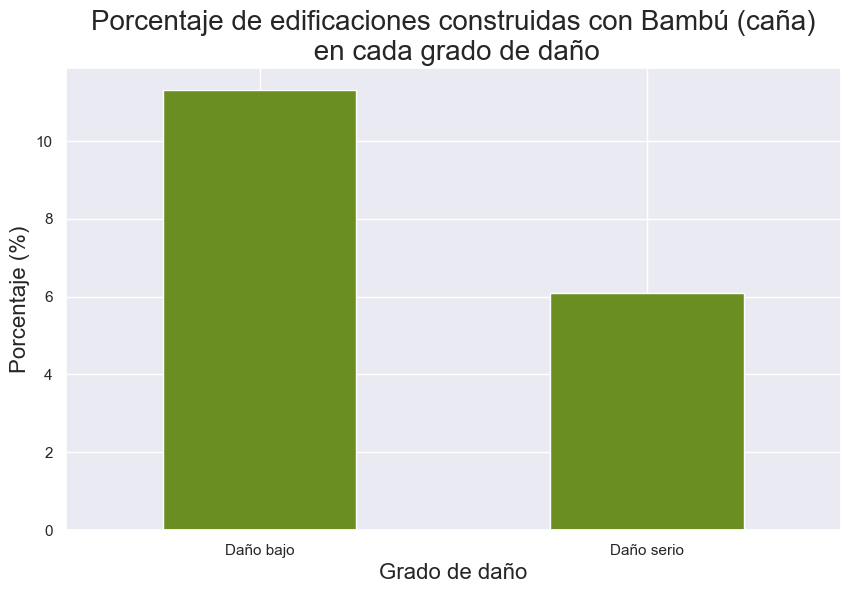

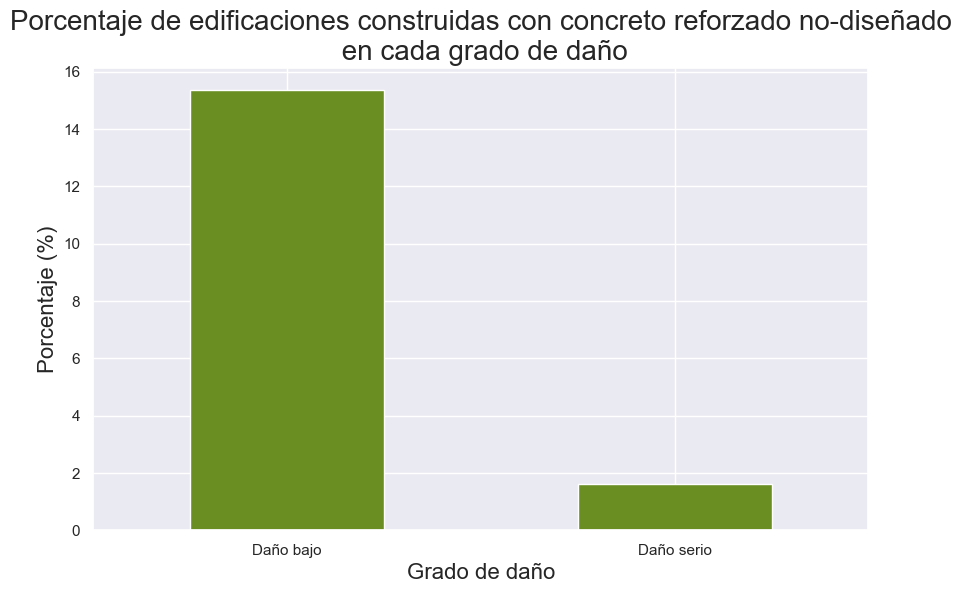

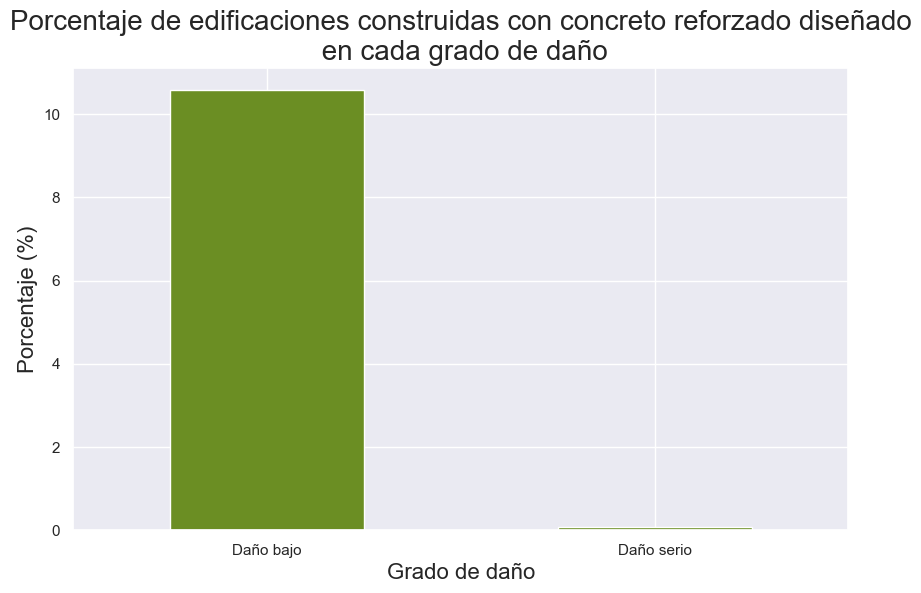

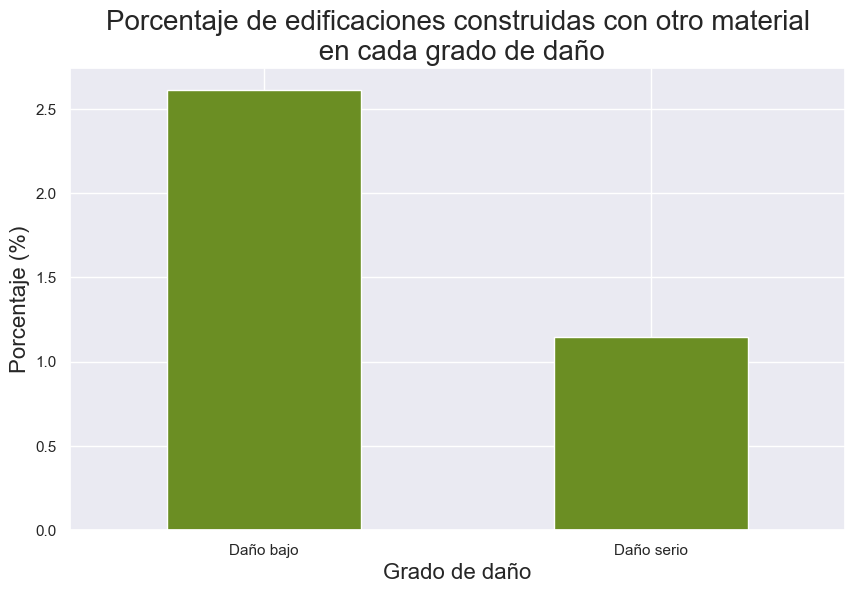

In [12]:
for i in range (0,len(superstructure_bools)):
    g = porcentajes_para_graficar.loc[:,superstructure_bools[i]]\
    .plot(kind='bar', 
                         color='olivedrab',figsize=(10,6), rot=0)
    g.set_title('Porcentaje de edificaciones construidas'
            ' con ' + titulos[i] + '\n en cada grado de daño'
            , fontsize=20)
    g.set_xlabel('Grado de daño', fontsize=16)
    g.set_ylabel('Porcentaje (%)', fontsize=16)
    plt.show()

Conclusiones barro-piedra: 
En este grafico se puede apreciar que mientras que es muy comun que las edificaciones que recibieron daños serios hayan sido construidas con barro-piedra (87%), no lo es tanto para las edificaciones que presentan un bajo nivel de daños (35%). De esto se puede concluir que las construcciones de este tipo no tendieron a mitigar bien los daños.

Conclusiones cemento - ladrillos: En este caso se puede ver que en las edificaciones que recibieron un bajo nivel de daños, es mucho mas comun que hayan sido construidas con cemento - ladrillos que en las que recibieron daños serios (28% contra 1%). De esto se puede concluir que este tipo de construcciones ayudo a mitigar los daños.

## Analisis de las construcciones realizadas con barro - piedra

## ¿Como fue la distribucion de los grados de daño de las edificaciones construidas con barro - piedra en relacion a las que no fueran construidas con estos?

Para responder esta pregunta realizamos un grafico comparando las cantidades para ambos casos

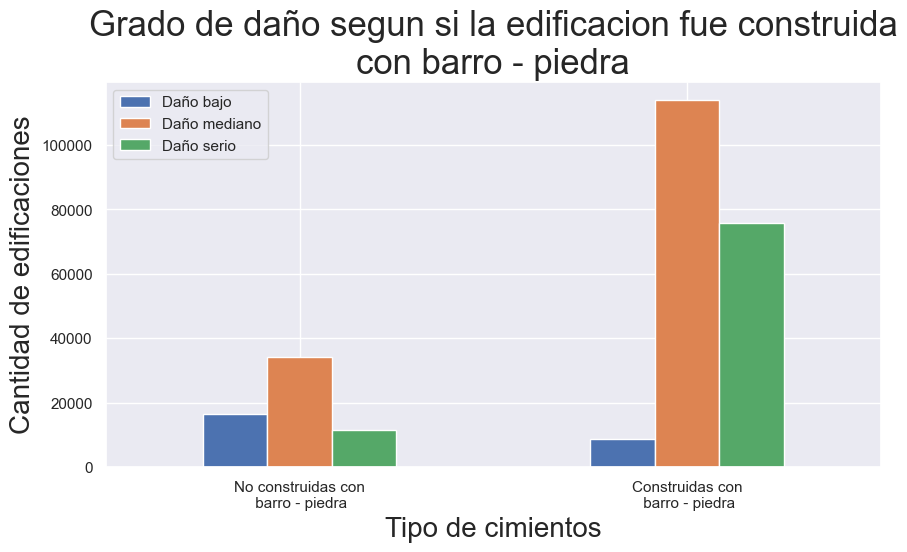

In [13]:
aux = values[['damage_grade', 'has_superstructure_mud_mortar_stone',
            'geo_level_1_id']]
aux = aux.groupby(['damage_grade',
                   'has_superstructure_mud_mortar_stone']).count()
aux = aux.unstack(0)
g = aux.plot.bar(figsize=(10,5), rot=0)
g.set_title("Grado de daño segun si la edificacion fue construida\n"
            "con barro - piedra",
            fontsize=25)
g.set_xlabel("Tipo de cimientos",fontsize=20)
g.set_ylabel("Cantidad de edificaciones", fontsize=20)
g.set_xticklabels(['No construidas con\n barro - piedra',
                   'Construidas con\n barro - piedra'])
plt.legend(['Daño bajo','Daño mediano','Daño serio'])

Lo que se puede ver en este grafico es que si bien en ambos casos predominan las edificaciones de daño medio, una clara diferencia que se obvserva es que mientras que entre las edificaciones que no fueron construidas con barro - piedra la cantidad de las que recibieron daños bajos es ligeramente mayor a las que recibieron daños serios, entre las que si fueron construidas con dicho material la cantidad la cantidad de edificaciones que recibieron daños serios es altamente superior a las pocas que recibieron daños bajos. Esto lleva a pensar que las casas construidas con esos materiales no soportaron bien el terremoto.

# Analsis variables categoricas

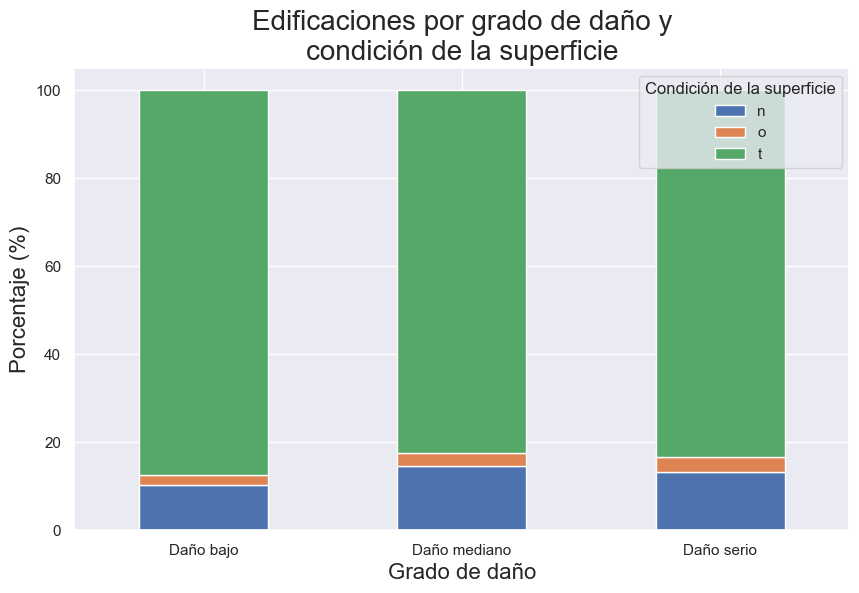

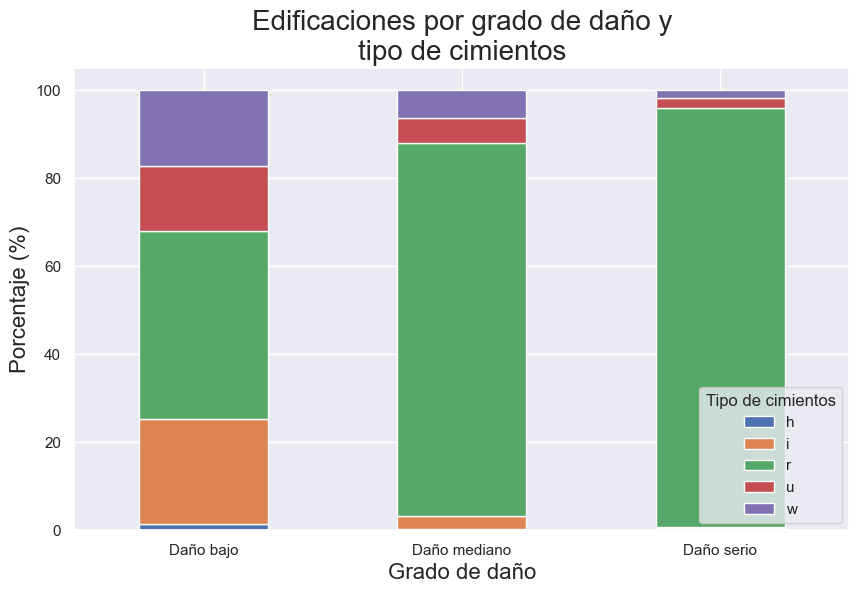

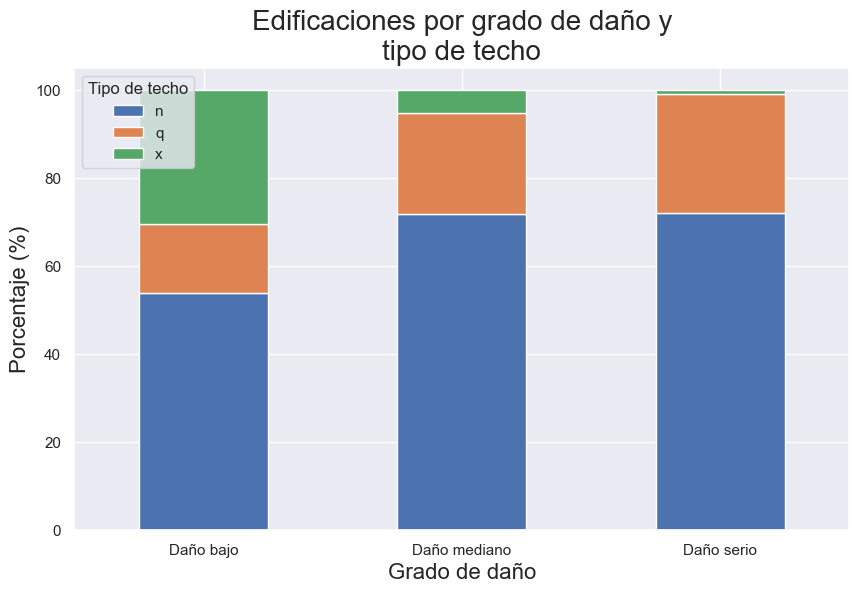

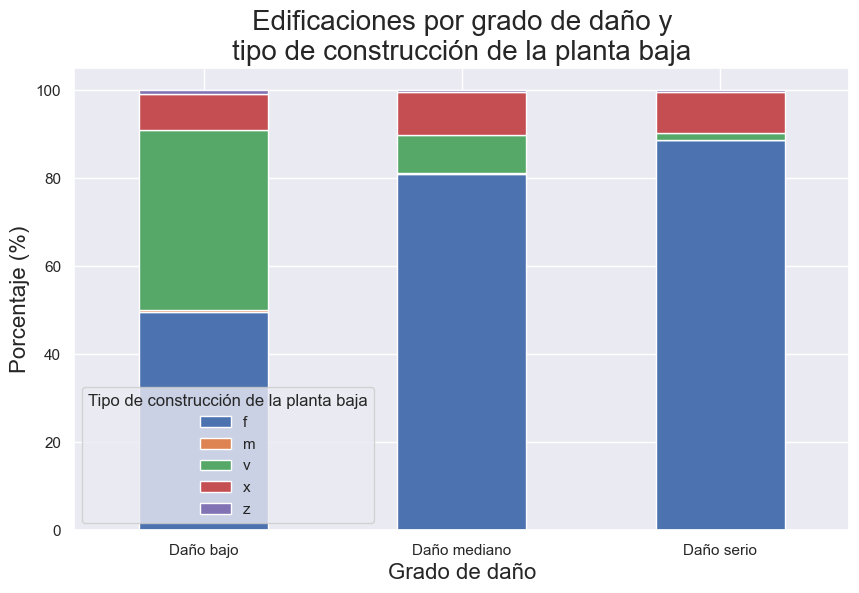

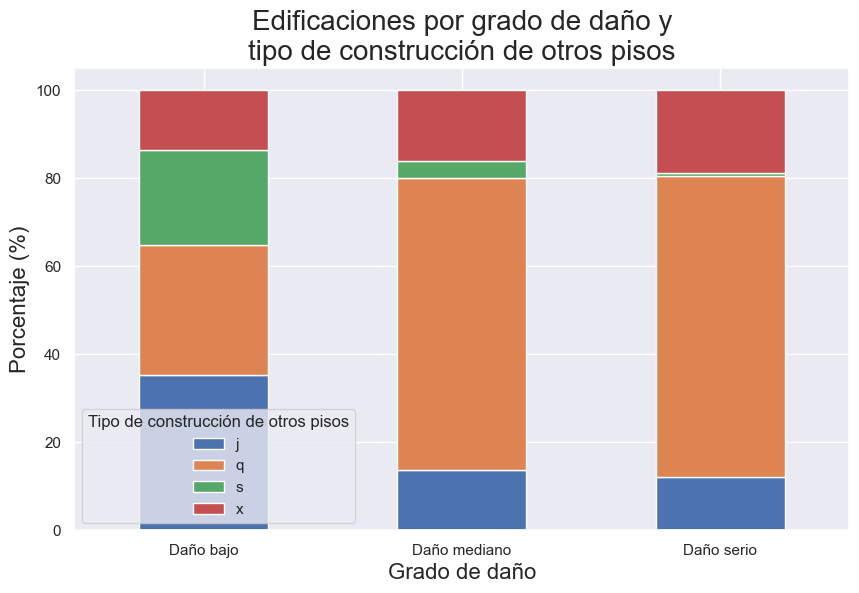

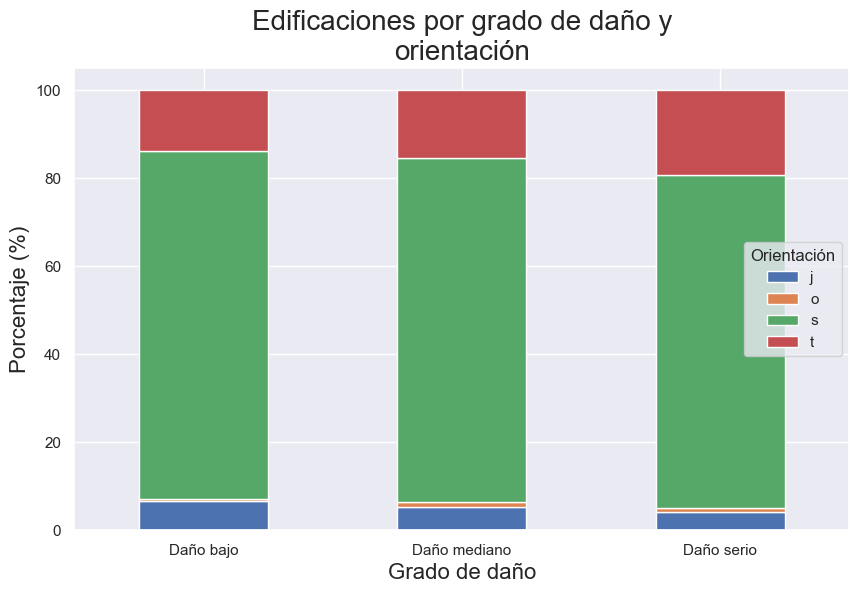

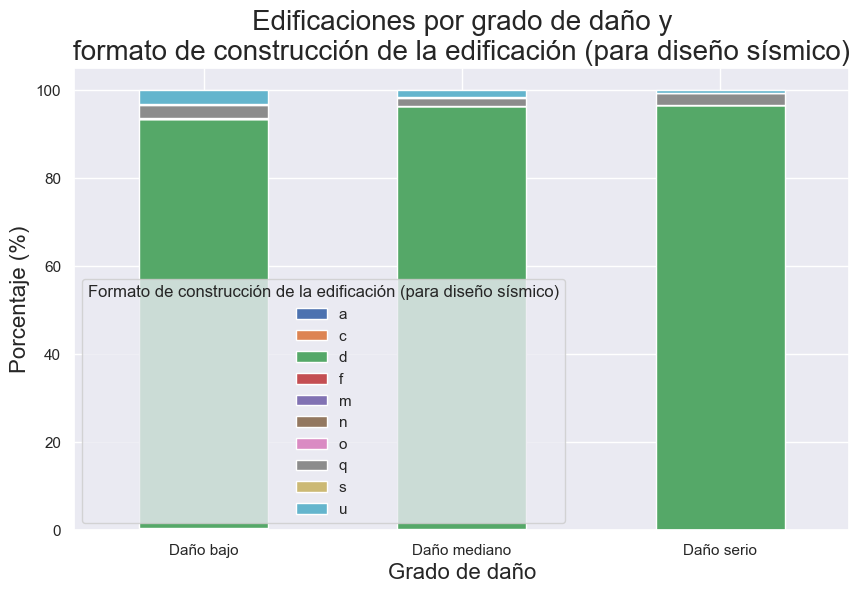

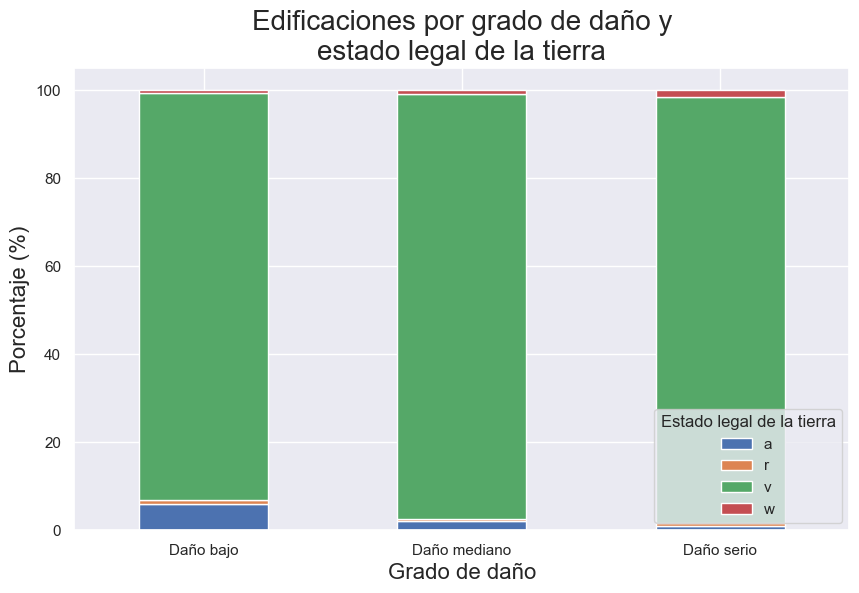

In [14]:
def graficarPorcentajesDeCategoricos(serie, titulo):
    serie = serie.value_counts(normalize=True) * 100
    g = serie.unstack(1)\
    .rename(index={1:'Daño bajo', 2:'Daño mediano', 3: 'Daño serio'})\
    .plot(kind='bar', stacked=True, rot=0, figsize=(10,6))
    
    g.set_title('Edificaciones por grado de daño y\n' + titulo,
               fontsize=20)
    g.set_xlabel('Grado de daño', fontsize=16)
    g.set_ylabel('Porcentaje (%)', fontsize=16)
    plt.legend(title=titulo.capitalize())
    plt.show()


agrupados = values.groupby('damage_grade')

graficarPorcentajesDeCategoricos(agrupados.land_surface_condition, 
                'condición de la superficie')
graficarPorcentajesDeCategoricos(agrupados.foundation_type, 
                                  'tipo de cimientos')
graficarPorcentajesDeCategoricos(agrupados.roof_type, 
                                  'tipo de techo')
graficarPorcentajesDeCategoricos(agrupados.ground_floor_type, 
            'tipo de construcción de la planta baja')
graficarPorcentajesDeCategoricos(agrupados.other_floor_type, 
            'tipo de construcción de otros pisos')
graficarPorcentajesDeCategoricos(agrupados.position, 
                                  'orientación')
graficarPorcentajesDeCategoricos(agrupados.plan_configuration, 
    'formato de construcción de la edificación (para diseño sísmico)')
graficarPorcentajesDeCategoricos(agrupados.legal_ownership_status, 
                            'estado legal de la tierra')

Condicion de la superficie: se puede apreciar que en cada grado de daño, los porcentajes de edificaciones que tenian cada una de las condiciones de la superficie son bastante similares. Sin embargo se puede ver una pequeña diferencia, que es que para las edificaciones que recibieron daño bajo, es levevemnte mas comun haber tenido una condicion de la superficie 't' y mas raro haber tenido una 'n' que para las otras

Tipo de cimientos: lo primero que salta a la vista de analizar este grafico, es la gran diferencia que existe entre los porcentajes de edificaciones con tipo de cimientos 'r' para los distintos grados de daño: el porcentaje de casas con tipo de cimientos 'r' aumenta a medida que aumenta el grado de daño. El aumento mas significativo se produce cuando se pasa de coinciderar las edificaciones con daño bajo a coinciderar las edificaciones con daño mediano. Esto permite decir, que el tipo de cimientos 'r' no tendio a resisitr de la mejor manera el terremoto Gorkha. Tambien se puede ver que los porcentajes de los otros tipos de cimientos disminuyen a medida que aumenta el grado de daño.

Tipo de techo: el tipo de techo 'n' es practicamente igual de comun entre las edificaicones de daño serio y las de daño mediano, pero menos comun entre las de daño bajo. El tipo de techo 'x' reduce marcadamente su porcentaje a medida que se aumenta el grado de daño que se coincidera, lo que indica que tendio a soportar bien el terremoto. El porcentaje de techos del tipo 'q' aumenta al aumentar el grado de daño.

Tipo de construccion de otros pisos: los porcenajes de participacion de 'j' y 'q' practicamente no varian entre las edificaciones de daños medianos y las de daños serios. Sin embargo, al comparar con las edificaciones que recibieron daños bajos, 'q' representa un porcentaje mucho menor en estas y 'j' uno mucho mayor. El porcentaje de participacion de 'x' aumenta a medida que aumenta el grado de daño mientras que el de 's' se reduce.

Orientacion: en este grafico no se aprecian grandes cambios en los porcentajes de participacion, como si ocurre en otros casos. Sin embargo, se puede notar un ligero aumento de la participacion de 't' a medida que auementa el grado de daño, que 'o' tiene una participacion levenmente menor en las de daño bajo que entre las otras y 'j' una un poco menor entre las de daño serio. 

Estado legal de la tierra: los porcentajes de los estados legales de la tierrar 'v' (que tiende hacer mucho mayor que los de los otros estados legales) y 'w' aumentan a medida que aumenta el grado de daño, el 'a' disminuye y el 'r' se mantiene

## ¿Cuales fueron las regiones geograficas mas y menos dañadas?

Para responder esta pregunta utilizamos dos criterios, que se diferencian en lo que se entiende por region geografica. Para el primer caso tomamos como de una misma region a todos los que comparten el geo_level_1_id y para el segundo a todos los que comparten los 3 ids de la region. En ambos casos para realizar el analisis nos quedamos solo con las regiones que contenian al menos una cierta cantidad de edificaciones, para disminuir el desvio standar de la muestra. 

Para los dos casos el dato que evaluamos fue el grado de daño (coinciderandolo como un numero) y nos quedamos con los que tenian un promedio mayor o igual 2.75 (lo que querria decir que los daños en la zona fueron severos) o menor o igual a 1.25 (lo que querria decir que la zona no fue tan impactada) y una desviacion standar menor o igual 0.5, para garantizar que el promedio sea representativo de las edificaciones que estan en la zona. Para el caso en el que definimos una zona como los que comparten el geo_level_1_id nos quedamos con las zonas de al menos 5000 edificaciones y para el otro caso nos quedamos con las zonas de al menos 100 edificaciones.

In [15]:
aux = values.groupby('geo_level_1_id')['damage_grade']\
    .agg(['count', 'std', 'mean'])
aux.loc[(aux['count']>=5000) & (aux['std']<= 0.5) & 
      ((aux['mean'] >= 2.75) |  (aux['mean']<= 1.25))]

,count,std,mean
geo_level_1_id,,,
17,21813,0.435225,2.79448


In [16]:
aux = values.groupby(['geo_level_1_id', 'geo_level_2_id',
                    'geo_level_3_id'])['damage_grade']\
    .agg(['count', 'std', 'mean'])
aux.loc[(aux['count']>=100) & (aux['std']<= 0.5) & 
      ((aux['mean'] >= 2.75) |  (aux['mean']<= 1.25))]

count       std      mean
geo_level_1_id geo_level_2_id geo_level_3_id                           
3              720            6460              107  0.415491  2.841121
               1006           5957              120  0.222035  2.966667
6              1253           3073              172  0.404987  1.186047
10             87             2755              117  0.447510  2.820513
17             421            4900              127  0.379614  2.850394
               682            1743              117  0.130179  2.982906
               1080           4391              143  0.478536  2.804196
                              6609              111  0.413530  2.783784
21             363            3485              126  0.432417  2.753968
                              4982              107  0.443810  2.803738
                              12093             111  0.378367  2.828829
26             39             1324              100  0.368453  1.160000
27             1155           7851              108  0.135445  2.981481

## ¿Como afecto la edad de las edificaicones al daño que recibieron?

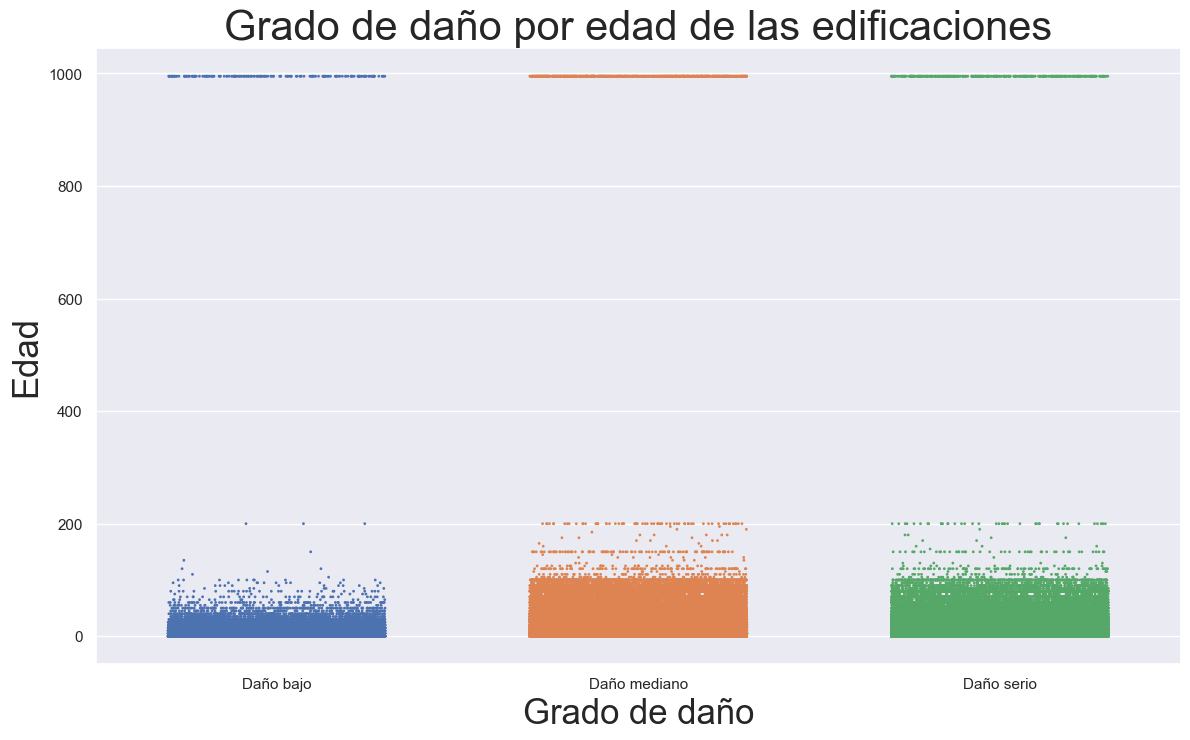

In [17]:
fig, ax = plt.subplots(figsize=(14,8))
sns.stripplot(data=values, x="damage_grade", y="age", 
              jitter=0.3, size=2)
ax.set_title('Grado de daño por edad de las edificaciones',
             fontsize=30)
ax.set_xlabel('Grado de daño', fontsize = 25)
ax.set_ylabel('Edad', fontsize = 25)
ax.set_xticklabels(['Daño bajo', 'Daño mediano', 'Daño serio'])
plt.show()

Dado que las edificaciones de edad 995 dificultan un poco la visualizacion de los datos, se vuelve a hacer este grafico sin dichas edificaciones

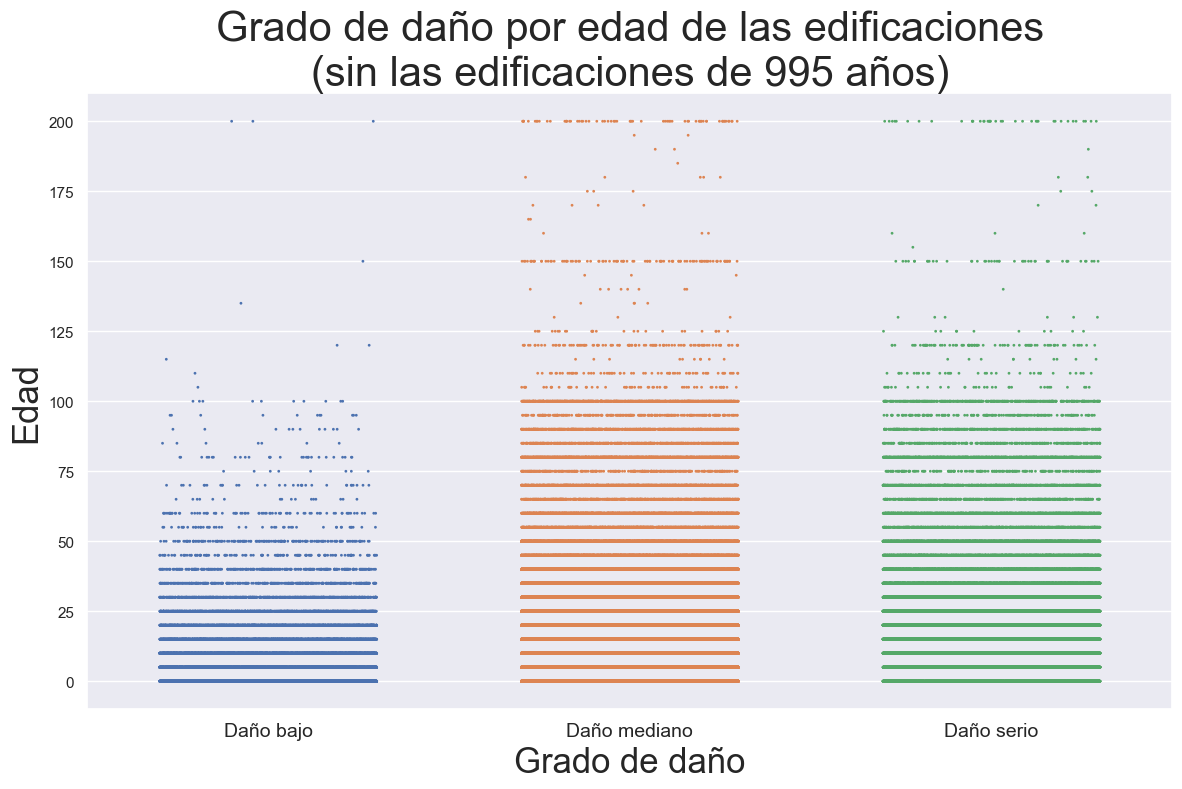

In [25]:
fig, ax = plt.subplots(figsize=(14,8))
sns.stripplot(data=values.loc[values['age'] != 995,:],
              x="damage_grade", y="age", 
              jitter=0.3, size=2)
ax.set_title('Grado de daño por edad de las edificaciones\n'
             '(sin las edificaciones de 995 años)',
             fontsize=30)
ax.set_xlabel('Grado de daño', fontsize = 25)
ax.set_ylabel('Edad', fontsize = 25)
ax.set_xticklabels(['Daño bajo', 'Daño mediano', 'Daño serio'],
                  fontsize=14)
plt.show()

En el grafico se puede ver como se distribuyen las edificaciones de acuerdo a su grado de daño y edad. Se puede apreciar que los grados de daño medio y serio presentan distribuciones de las edades bastante similares mientras que las edificaciones que recibieron daño bajo tienden a ser mas nuevas.

Para el caso de las edificaciones de 995 años, buscamos comparar los porcentajes segun el grado de daño

In [19]:
edad995 = values.loc[values['age'] == 995,'damage_grade']
porcentajes = edad995.value_counts() / len(edad995) * 100
porcentajes

2    59.136691
3    27.985612
1    12.877698
Name: damage_grade, dtype: float64

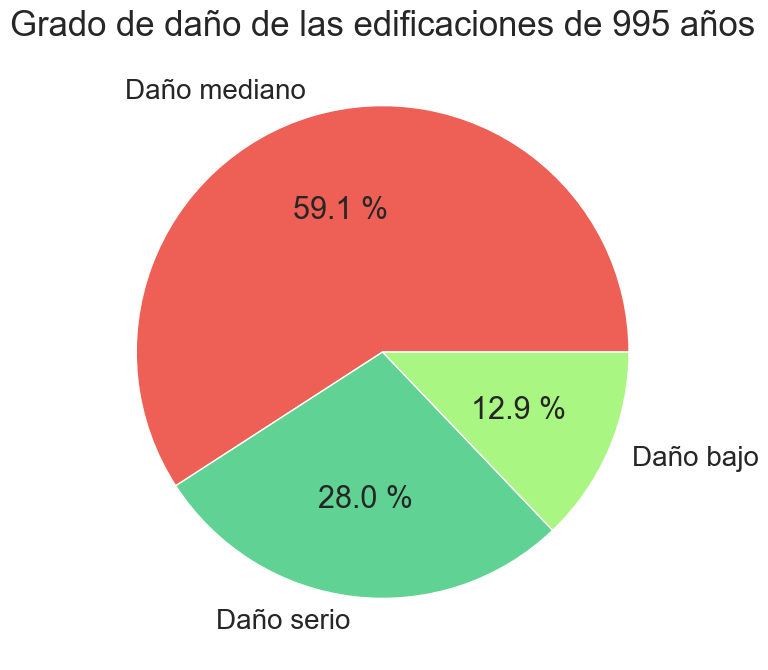

In [20]:
fig, ax = plt.subplots(figsize=(14,8))
etiquetas = ['Daño mediano', 'Daño serio', 'Daño bajo']
colores = ["#EE6055","#60D394","#AAF683"]
wedges, labels, autopct = plt.pie(porcentajes,
        labels=etiquetas,  autopct="%0.1f %%", colors=colores)
ax.set_title("Grado de daño de las edificaciones de 995 años",
             fontsize=25)
for i in labels:
    i.set_fontsize(20)
for j in autopct:
    j.set_fontsize(22)

Este grafico es similar al realizado para todas las edificaciones, aunque comparandolo con este se obvserva un menor porcentaje de edificaciones con daño serio y mayores porcentajes para los otros grados de daño.

## ¿El porcentaje de area se distribuye de manera distinta segun el grado de daño?

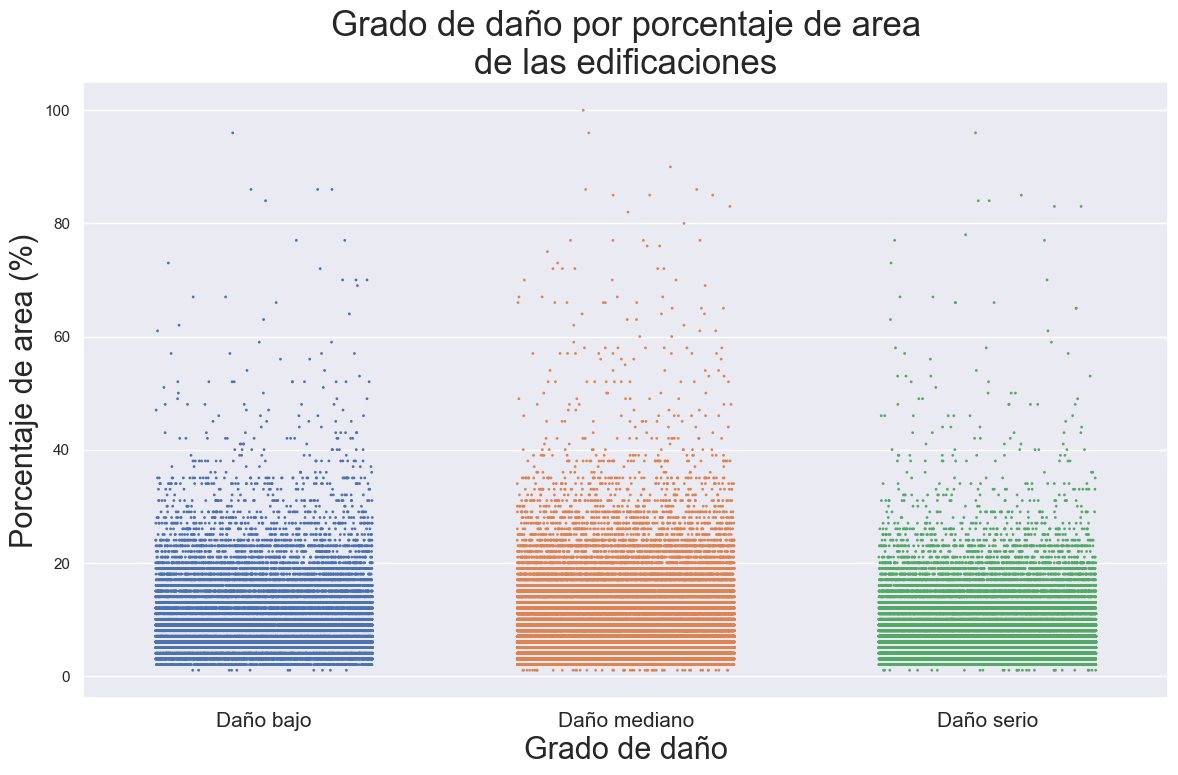

In [21]:
fig, ax = plt.subplots(figsize=(14,8))
sns.stripplot(data=values, x='damage_grade', y='area_percentage', 
              jitter=0.3, size=2)
ax.set_title('Grado de daño por porcentaje de area\n'
             'de las edificaciones',
             fontsize=25)
ax.set_xlabel('Grado de daño', fontsize = 22)
ax.set_ylabel('Porcentaje de area (%)', fontsize = 22)
ax.set_xticklabels(['Daño bajo', 'Daño mediano', 'Daño serio'],
                  fontsize=15)
plt.show()

En este grafico no se obvservan diferencias claras entre los distintos grados de daño

## ¿Existen combinaciones de valores para las cuales los daños hayan sido muy altos o muy bajos?

Para responder esto, agrupamos las variables de a pares y de todas las combinaciones de valores posibles nos quedamos con las que tienen en promedio daños mayores o iguales a 2.75 o menores iguales a 1.25. Para evitar que el valor elevado o bajo del promedio sea concecuencia de que nos estamos quedando con pocas edificaciones, nos quedamos solo con las combinaciones de al menos 3000 edificaciones.

In [22]:
cols = values.columns
resultados = []

for i in range(1,len(cols)-1):
    # Lo hago en ese rango para no usar ni bulding_id
    # ni el damage_grade
    for j in range(i+1,len(cols)-1):
        aux = values[[cols[i], cols[j], 'damage_grade']]
        aux = aux.groupby([cols[i],cols[j]]).agg(['mean', 'count'])
        aux = aux.loc[(aux[('damage_grade', 'count')]>3000) &
        ((aux[('damage_grade', 'mean')]>=2.75)|
        (aux[('damage_grade', 'mean')]<=1.25))]
        if (len (aux)>0):
            resultados.append(aux.index)

resultados

[MultiIndex([(17, 2),
             (17, 3)],
            names=['geo_level_1_id', 'count_floors_pre_eq']),
 MultiIndex([(17, 10),
             (17, 15)],
            names=['geo_level_1_id', 'age']),
 MultiIndex([(17, 6),
             (17, 7)],
            names=['geo_level_1_id', 'area_percentage']),
 MultiIndex([(17, 4),
             (17, 5),
             (17, 6),
             (17, 7)],
            names=['geo_level_1_id', 'height_percentage']),
 MultiIndex([(17, 't')],
            names=['geo_level_1_id', 'land_surface_condition']),
 MultiIndex([(17, 'r')],
            names=['geo_level_1_id', 'foundation_type']),
 MultiIndex([(17, 'n'),
             (17, 'q')],
            names=['geo_level_1_id', 'roof_type']),
 MultiIndex([(17, 'f')],
            names=['geo_level_1_id', 'ground_floor_type']),
 MultiIndex([(17, 'q'),
             (17, 'x')],
            names=['geo_level_1_id', 'other_floor_type']),
 MultiIndex([(17, 's'),
             (17, 't')],
            names=['geo_level_1_

Dado que todos los resultados obtenidos contienen a la region 17, y como vimos anteriormente esta recibio daños muy severos, se puede pensar que los resultados tienen mas que ver con dicha region que con la combinacion de valores en si.

## ¿Existen combinaciones de valores para las cuales todas las edificaciones tengan grados de daño parecidos?

Al igual que en el caso anterior, agrupamos las variables de a pares pero esta vez nos quedamos solo con las que tenian al menos 2000 edificaciones y una desviacion estandard menor o igual a 0.35

In [23]:
cols = values.columns
resultados = []
for i in range(1,len(cols)-1):
# Voy en ese rango para que no tome builiding_id ni damage_grade
    for j in range(i+1,len(cols)-1):
        aux = values[[cols[i], cols[j], 'damage_grade']]
        aux = aux.groupby([cols[i],cols[j]]).agg(['std', 'count'])
        aux = aux.loc[(aux[('damage_grade', 'count')]>=2000) &
        ((aux[('damage_grade', 'std')]<= 0.35))]
        if (len (aux)>0):
            resultados.append(aux.index)

resultados

[MultiIndex([(17, 25)],
            names=['geo_level_1_id', 'age']),
 MultiIndex([(17, 'q')],
            names=['geo_level_1_id', 'roof_type'])]

Como en el caso anterior, todas las combinaciones contienen a la region 17, por lo que tendemos a creer que son concecuencia mas de esa region que de la combinacion de valores en si.